In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
amazon=pd.read_csv("amazon.csv",usecols=['product_name', 'retail_price','discounted_price', 'brand'])
flipkart=pd.read_csv("flipkart.csv",usecols=['product_name','retail_price', 'discounted_price', 'brand'])

In [3]:
amazon.head()

,product_name,retail_price,discounted_price,brand
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,32143,29121,FabHomeDecor
2,AW Bellies,991,551,AW
3,Alisha Solid Women's Cycling Shorts,694,325,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,208,258,Sicons


In [4]:
flipkart.head()

,product_name,retail_price,discounted_price,brand
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor
2,AW Bellies,999.0,499.0,AW
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons


In [5]:
df=pd.concat([amazon, flipkart],axis=1, keys = ['amazon', 'flipkart'])
df

amazon                                \
                                  product_name retail_price discounted_price   
0          Alisha Solid Women's Cycling Shorts          982              438   
1          FabHomeDecor Fabric Double Sofa Bed        32143            29121   
2                                   AW Bellies          991              551   
3          Alisha Solid Women's Cycling Shorts          694              325   
4        Sicons All Purpose Arnica Dog Shampoo          208              258   
...                                        ...          ...              ...   
19995           WALLDESIGN SMALL VINYL STICKER         1498              876   
19996  WALLMANTRA LARGE VINYL STICKERS STICKER         1415             1424   
19997  ELITE COLLECTION MEDIUM ACRYLIC STICKER         1284             1196   
19998  ELITE COLLECTION MEDIUM ACRYLIC STICKER         1492             1364   
19999  ELITE COLLECTION MEDIUM ACRYLIC STICKER         1484             1247   

                                                        flipkart               \
                  brand                             product_name retail_price   
0                Alisha      Alisha Solid Women's Cycling Shorts        999.0   
1          FabHomeDecor      FabHomeDecor Fabric Double Sofa Bed      32157.0   
2                    AW                               AW Bellies        999.0   
3                Alisha      Alisha Solid Women's Cycling Shorts        699.0   
4                Sicons    Sicons All Purpose Arnica Dog Shampoo        220.0   
...                 ...                                      ...          ...   
19995        WallDesign           WallDesign Small Vinyl Sticker       1500.0   
19996        Wallmantra  Wallmantra Large Vinyl Stickers Sticker       1429.0   
19997  Elite Collection  Elite Collection Medium Acrylic Sticker       1299.0   
19998  Elite Collection  Elite Collection Medium Acrylic Sticker       1499.0   
19999  Elite Collection  Elite Collection Medium Acrylic Sticker       1499.0   

                                          
      discounted_price             brand  
0                379.0            Alisha  
1              22646.0      FabHomeDecor  
2                499.0                AW  
3                267.0            Alisha  
4                210.0            Sicons  
...                ...               ...  
19995            730.0        WallDesign  
19996           1143.0        Wallmantra  
19997            999.0  Elite Collection  
19998           1199.0  Elite Collection  
19999            999.0  Elite Collection  

[20000 rows x 8 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (amazon, product_name)        20000 non-null  object 
 1   (amazon, retail_price)        20000 non-null  int64  
 2   (amazon, discounted_price)    20000 non-null  int64  
 3   (amazon, brand)               14136 non-null  object 
 4   (flipkart, product_name)      20000 non-null  object 
 5   (flipkart, retail_price)      19922 non-null  float64
 6   (flipkart, discounted_price)  19922 non-null  float64
 7   (flipkart, brand)             14136 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ MB


In [7]:
df.corr()

amazon                      flipkart  \
                          retail_price discounted_price retail_price   
amazon   retail_price         1.000000         0.977016     1.000000   
         discounted_price     0.977016         1.000000     0.977016   
flipkart retail_price         1.000000         0.977016     1.000000   
         discounted_price     0.981180         0.998837     0.981180   

                                            
                          discounted_price  
amazon   retail_price             0.981180  
         discounted_price         0.998837  
flipkart retail_price             0.981180  
         discounted_price         1.000000

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

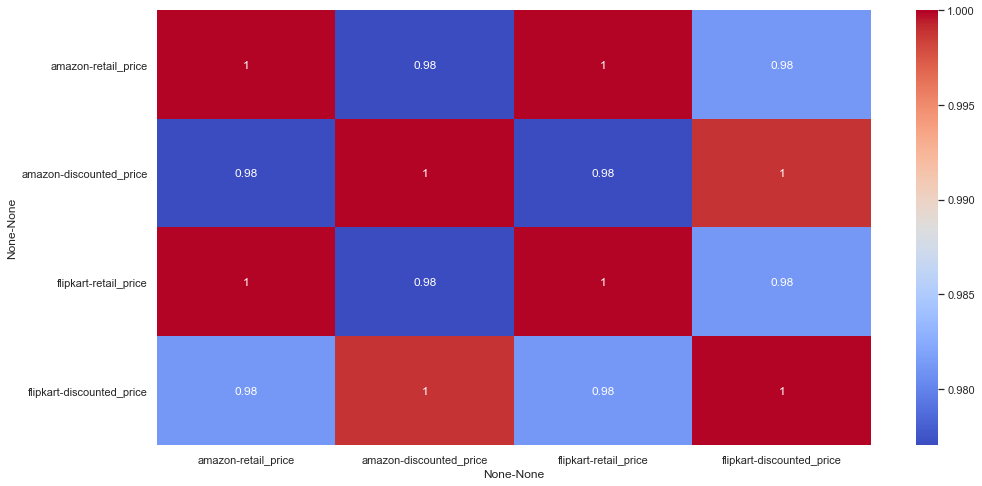

In [8]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [16]:
df[~df['amazon']['product_name'].isin(df['flipkart']['product_name'])]

amazon               \
                                            product_name retail_price   
20            SICONS CONDITIONING CONDITONER DOG SHAMPOO           97   
21                   ALISHA SOLID WOMEN'S CYCLING ShorTS           -2   
22               DONGLI PRINTED BOY'S ROUND NECK T-SHIRT         2382   
23                                    SWAGGA WOMEN CLOGS         1490   
24     KENNEL RUBBER DUMBELL WITH BELL - SMALL RUBBER...          185   
...                                                  ...          ...   
19995                     WALLDESIGN SMALL VINYL STICKER         1498   
19996            WALLMANTRA LARGE VINYL STICKERS STICKER         1415   
19997            ELITE COLLECTION MEDIUM ACRYLIC STICKER         1284   
19998            ELITE COLLECTION MEDIUM ACRYLIC STICKER         1492   
19999            ELITE COLLECTION MEDIUM ACRYLIC STICKER         1484   

                                          \
      discounted_price             brand   
20                 119            Sicons   
21                   0            Alisha   
22                1254            dongli   
23                1821            SWAGGA   
24                 209            Kennel   
...                ...               ...   
19995              876        WallDesign   
19996             1424        Wallmantra   
19997             1196  Elite Collection   
19998             1364  Elite Collection   
19999             1247  Elite Collection   

                                                flipkart               \
                                            product_name retail_price   
20            Sicons Conditioning Conditoner Dog Shampoo        110.0   
21                   Alisha Solid Women's Cycling Shorts          NaN   
22               dongli Printed Boy's Round Neck T-Shirt       2400.0   
23                                    SWAGGA Women Clogs       1500.0   
24     Kennel Rubber Dumbell With Bell - Small Rubber...        190.0   
...                                                  ...          ...   
19995                     WallDesign Small Vinyl Sticker       1500.0   
19996            Wallmantra Large Vinyl Stickers Sticker       1429.0   
19997            Elite Collection Medium Acrylic Sticker       1299.0   
19998            Elite Collection Medium Acrylic Sticker       1499.0   
19999            Elite Collection Medium Acrylic Sticker       1499.0   

                                          
      discounted_price             brand  
20               100.0            Sicons  
21                 NaN            Alisha  
22              1039.0            dongli  
23              1500.0            SWAGGA  
24               190.0            Kennel  
...                ...               ...  
19995            730.0        WallDesign  
19996           1143.0        Wallmantra  
19997            999.0  Elite Collection  
19998           1199.0  Elite Collection  
19999            999.0  Elite Collection  

[3445 rows x 8 columns]

<b>Here we get to know that the only diff that is caused here is the upper case and lower case.
    this can be changed by str.lower().
    
   Also If the items here would have been diff in both the data sets then we could have used nlp to match the name of the products.
</b>



Thank You